In [31]:
# !pip install scikit scipy pandas matplotlib statsmodels fastapi uvicorn pydantic pingouin seaborn ipykernel

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import zscore
from scipy.stats import shapiro, kstest
import pingouin as pg

### Carga dos dados

In [33]:

# Abrir o dataset
df_pontos = pd.read_csv("./datasets/Student_Marks.csv")
df_pontos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


### AED

In [34]:
# Medidas estatisticas das variáveis

df_pontos.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


<Axes: xlabel='time_study', ylabel='Marks'>

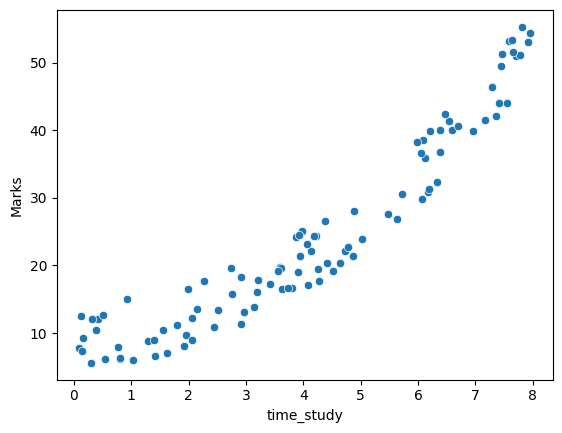

In [35]:
# Plot de dispersão
# X = Horas de estudo
# X = Pontuação final
sns.scatterplot(data=df_pontos, x="time_study", y="Marks")

<Axes: ylabel='time_study'>

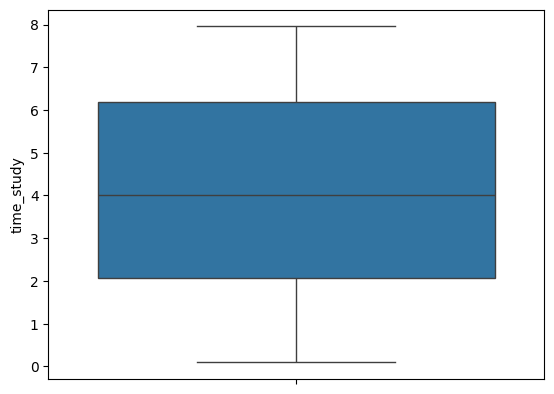

In [36]:
# Verificação de outliers

sns.boxplot(df_pontos, y="time_study")

<Axes: ylabel='Marks'>

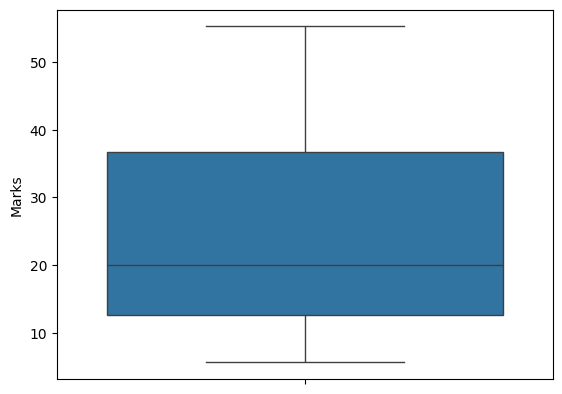

In [37]:
# Verificação de outliers

sns.boxplot(df_pontos, y="Marks")

<Axes: >

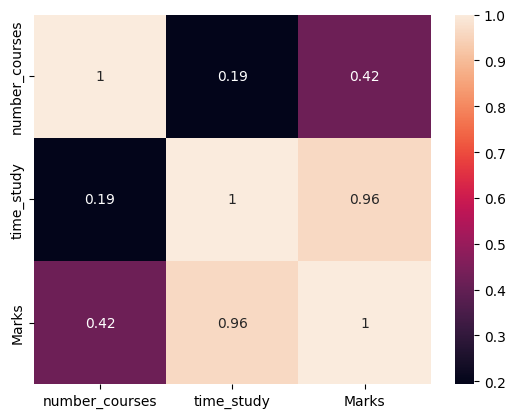

In [38]:
# Estabelecer correlação das horas de estudo com a pontuação final - Pearson

sns.heatmap(df_pontos.corr("spearman"), annot = True)


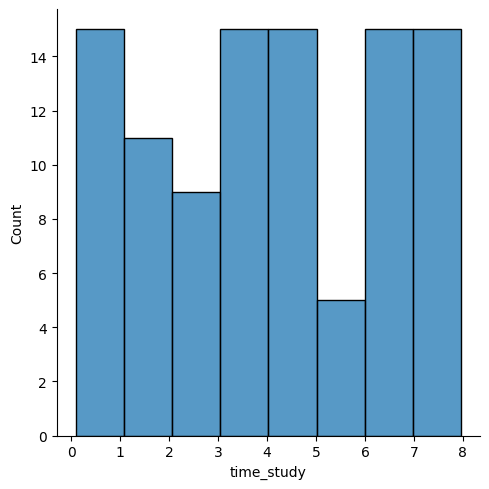

In [39]:
# Histograma das variáveis
sns.displot(df_pontos, x="time_study")

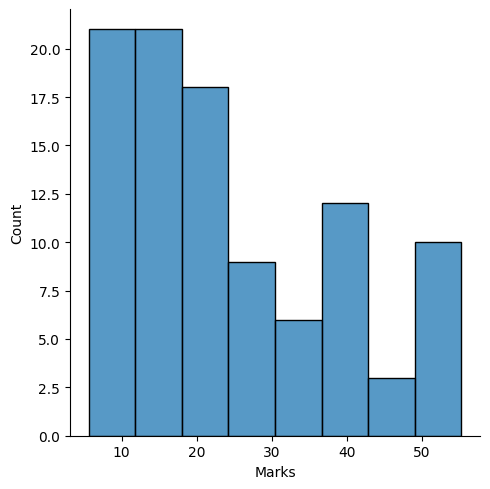

In [40]:
sns.displot(df_pontos, x="Marks")

##Treinar modelo

In [41]:
#Divisão do dataset
X = df_pontos["time_study"].values.reshape(-1, 1)
y = df_pontos["Marks"].values.reshape(-1, 1)
X

array([[4.508],
       [0.096],
       [3.133],
       [7.909],
       [7.811],
       [3.211],
       [6.063],
       [3.413],
       [4.41 ],
       [6.173],
       [7.353],
       [0.423],
       [4.218],
       [4.274],
       [2.908],
       [4.26 ],
       [5.719],
       [6.08 ],
       [7.711],
       [3.977],
       [4.733],
       [6.126],
       [2.051],
       [4.875],
       [3.635],
       [1.407],
       [0.508],
       [4.378],
       [0.156],
       [1.299],
       [3.864],
       [1.923],
       [0.932],
       [6.594],
       [4.083],
       [7.543],
       [2.966],
       [7.283],
       [6.533],
       [7.775],
       [0.14 ],
       [2.754],
       [3.591],
       [1.557],
       [1.954],
       [2.061],
       [3.797],
       [4.779],
       [5.635],
       [3.913],
       [6.703],
       [4.13 ],
       [0.771],
       [6.049],
       [7.591],
       [2.913],
       [7.641],
       [7.649],
       [6.198],
       [7.468],
       [0.376],
       [2.438],
       [

In [42]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [43]:
# Instanciar o modelo a ser treinado

reg_model = LinearRegression()

In [44]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

### Validação do modelo - métricas

In [45]:
# Predição dos valores com base no conjunto de testes

y_pred = reg_model.predict(X_test)


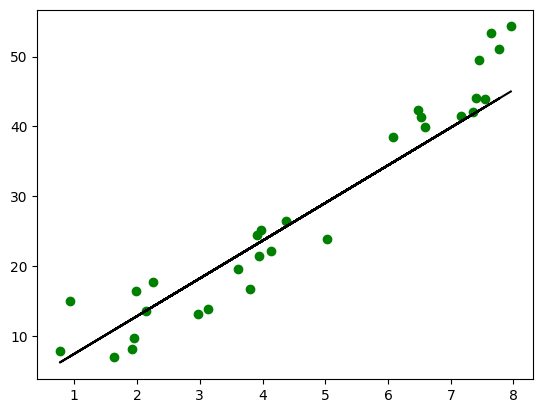

In [46]:
plt.scatter(X_test, y_test, color="g")
plt.plot(X_test, y_pred, color="k")

In [47]:
# Calculo da métrica R-squared
r2_score(y_test, y_pred)

0.9080296257704301

In [48]:
# calculo da métrica MAE (Mean Absolute Error)

mean_absolute_error(y_test, y_pred)

np.float64(3.7402352062847615)

In [49]:
# calculo da métrica MSE (Mean Squared Error)
mean_squared_error(y_test, y_pred)

np.float64(20.830470219591337)

In [50]:
# calculo da métrica RMSE (Square Root Mean Squared Error)
mean_squared_error(y_test, y_pred, squared=False)

c:\Users\55119\.virtualenvs\regressaoLinear-ep2NlZQO\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(4.564040996703616)

<Axes: >

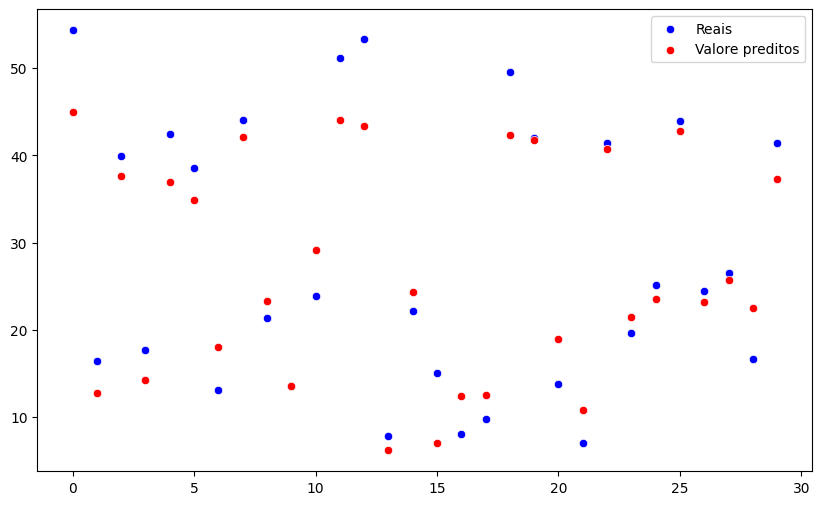

In [51]:
#Análise gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color="blue", label = "Reais")
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color="red", label = "Valore preditos")

## Análise de resíduos

In [52]:
# Calculo de resíduos
residuos = y_test - y_pred

In [53]:
# Calcular os resíduos padronizados
residuos_std = zscore(residuos)

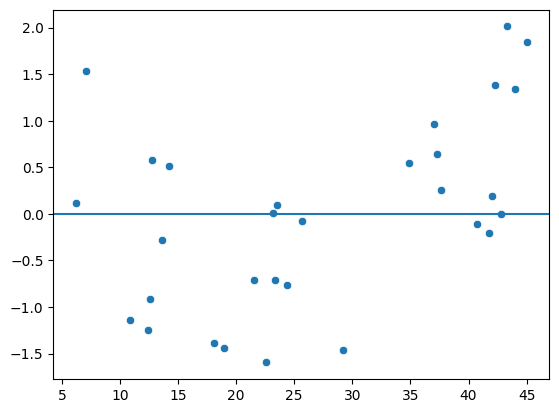

In [54]:
# Verificar linearidade do modelo
# Se os resíduos estiverem entre -2 e 2 (na escala padrão) - indica linearidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

Text(0, 0.5, 'Residuos na escala padrão')

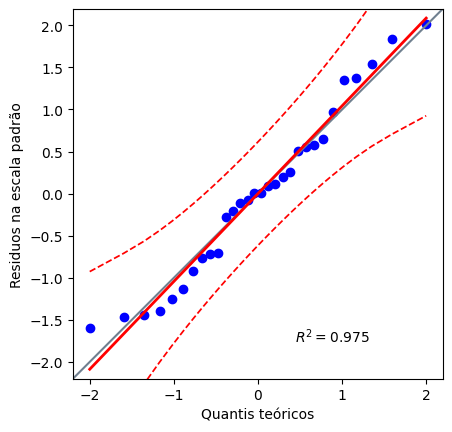

In [55]:
# Checar se resíduos seguem a distribuição normal
# QQ ( Quantile-Qunatile) Plot - Para avaliar se uma amostra segue uma distribuição normal

pg.qqplot(residuos_std, dist="norm", confidence=0.99)
plt.xlabel("Quantis teóricos")
plt.ylabel("Residuos na escala padrão")

In [56]:
# Teste de normalidade - Shapiro Wilk

stat_shapiro , p_valor_shapiro = shapiro(residuos.reshape(-1))

In [57]:
stat_shapiro

np.float64(0.9625540894285287)

In [58]:
p_valor_shapiro

np.float64(0.35940230319152233)

In [59]:
# Teste de normalidade - Kolmogorov-Smirnov

stat_ks, p_valor_ks = kstest(residuos.reshape(-1), "norm")

In [60]:
stat_ks

np.float64(0.41826414551301294)

In [61]:
p_valor_ks

np.float64(2.860184306333783e-05)

## Predições com o modelo

In [62]:
# Caso o aluno estude 30.4 horas, qual a pontuação prevista pelo modelo?

reg_model.predict([[3.4]])

array([[20.40589957]])

# Salvar modelo

In [63]:
import joblib
joblib.dump(reg_model, "./modelo_regressao.pkl")

['./modelo_regressao.pkl']